# Task 2.  Algorithms for unconstrained nonlinear optimization. Direct methods

### 2.1 Use the one-dimensional methods of exhaustive search, dichotomy and golden section search to find an approximate (with precision $\varepsilon = 0.001$) solution $x: f(x) \rightarrow min $ for the following functions and domains:

### $1) f(x) = x^3, x \in [0, 1]$
### $2) f(x) = |x - 0.2|, x \in [0, 1]$
### $3) f(x) = x \sin{\frac{1}{x}}, x \in [0.01, 1]$

### Calculate the number of $f$-calculations and the number of iterations performed in each method and analyze the results. Explain differences (if any) in the results obtained.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex


# Visualization - just to understand the correctness of further results
fig = plt.figure(figsize = (15, 8))
x_arr = np.linspace(0, 1, 5000)

func_arr = [lambda x: x ** 3, lambda x: abs(x - 0.2), lambda x: x * np.sin(1 / x)]
    
func_descr_arr = [r'$f_1(x) = x^3, \: x \in [0, \: 1]$',\
                  r'$f_2(x) = |x - 0.2|, \: x \in [0, \: 1]$',\
                  r'$f_3(x) = x\cdot\sin{(x^{-1})}, \: x \in [0.01, \: 1]$']

for func_num in range(3):

    plt.plot(x_arr[(func_num + 1) // 3:], func_arr[func_num](x_arr[(func_num + 1) // 3:]), linewidth = 2.0)
    plt.grid()
    
plt.legend(func_descr_arr, prop = {'size': 15}, loc = 'upper left')
plt.xlabel('x', size = 14)
plt.ylabel('y', size = 14)
plt.show()

<Figure size 1500x800 with 1 Axes>

In [2]:

def exhaustive_search(func, left_boundary, right_boundary, eps = 1e-3):
    
    """ exhaustive_search is a brute-force search of the value
        of x in area [a, b], where the func takes the minimum.

        eps means calculation error and equals 1e-3 by default """ 
    
    nodes_num = int(1 + (right_boundary - left_boundary) / eps)     # number of nodes in grid == len(grid)
    grid = np.linspace(left_boundary, right_boundary, nodes_num)    # grid of values of x
    
    func_eval_num = 0                                               # number of function evaluations
    iter_num = 0                                                    # number of iterations
    
    x_min = grid[0]
    func_min = func(x_min)
    func_eval_num += 1
        
    for i in range(1, nodes_num):
        
        func_curr = func(grid[i])
        func_eval_num += 1
        iter_num += 1

        if func_curr < func_min:
            
            x_min = grid[i]
            func_min = func_curr
    
    return x_min, func_eval_num, iter_num


def dichotomy_method(func, left_boundary, right_boundary, eps = 1e-3):
    
    """ dichotomy_method is a search of the value of x_min in area
        [a, b] by sequential dividing specified area in two pieces.
        
        the method calculates only the interval [a_i, b_i], in which
        the desired x_min value lies.

        eps means calculation error and equals 1e-3 by default """
        
    func_eval_num = 0                                               # function evaluation and iterations counters
    iter_num = 0
    
    a_i = left_boundary                                             # left and right borders of searching area on i-th iterarion
    b_i = right_boundary
    
    delta = eps / 2                                                 # let delta be eps / 2

    while abs(a_i - b_i) >= eps:
        
        x_1 = (a_i + b_i - delta) / 2
        x_2  = (a_i + b_i + delta) / 2
        
        if func(x_1) <= func(x_2):
            b_i = x_2
        else:
            a_i = x_1
            
        func_eval_num += 2
        iter_num += 1

    return a_i, b_i, func_eval_num, iter_num                        # value of x_min will be between a_i and b_i


def golden_section_method(func, left_boundary, right_boundary, eps = 1e-3):
    
    """ golden_section_method is a modification of dichotomy method
        with the value of delta equals to the golden section.
        
        the method also calculates only the interval [a_i, b_i],
        in which the desired x_min value lies.

        eps means calculation error and equals 1e-3 by default """

    
    func_eval_num = 0                                               # function evaluation and iterations counters
    iter_num = 0
    
    a_i = left_boundary                                             # left and right borders of searching area on i-th iterarion
    b_i = right_boundary

    while abs(a_i - b_i) >= eps:
        
        if not iter_num:                                            # this step for the 1-st iteration only 
            
            delta = (3 - np.sqrt(5)) * (b_i - a_i) / 2
            
            x_1 = a_i + delta
            x_2 = b_i - delta
            
            func_x_1 = func(x_1)
            func_x_2 = func(x_2)
            
            func_eval_num += 2
            
        if func_x_1 <= func_x_2:                                    # if the minimum is on the left side
            
            b_i = x_2
            x_2 = x_1
            x_1 = a_i + (3 - np.sqrt(5)) * (b_i - a_i) / 2

            func_x_2 = func_x_1
            func_x_1 = func(x_1)
            
            func_eval_num += 1
            
        else:                                                       # if the minimum is on the right side
            
            a_i = x_1
            x_1 = x_2
            x_2 = b_i - (3 - np.sqrt(5)) * (b_i - a_i) / 2
            
            func_x_1 = func_x_2
            func_x_2 = func(x_2)
            
            func_eval_num += 1

        iter_num += 1
        
    return a_i, b_i, func_eval_num, iter_num                        # value of x_min will be between a_i and b_i


# Test

func_eval_dict = {'exhaustive_search': [], 'dichotomy_method': [], 'golden_section_method': []}
iter_dict = {'exhaustive_search': [], 'dichotomy_method': [], 'golden_section_method': []}


for func_num in range(3):
    
    print('\n')
    
    display(Math(func_descr_arr[func_num]))
    
    (res, func_eval_ex, iter_num_ex) = exhaustive_search(func_arr[func_num], \
                                                         (lambda x: x % 3 == 0 and 0.01 or 0)(func_num + 1), 1)
    display(Math(r'\; minimum \: by \: exhaustive \: search: x_{' + str(func_num + 1) + '}^{min} = ' + str(round(res, 3))))
    
    func_eval_dict['exhaustive_search'].append(func_eval_ex)
    iter_dict['exhaustive_search'].append(iter_num_ex)
    
    (left, right, func_eval_d, iter_num_d) = dichotomy_method(func_arr[func_num], \
                                                              (lambda x: x % 3 == 0 and 0.01 or 0)(func_num + 1), 1)
    display(Math(r'\; minimum \: by \: dichotomy \: method: x_{' + str(func_num + 1) + \
                 '}^{min}  \in [' + str(round(left, 3)) + ', ' + str(round(right, 3)) + ']')) 
    
    func_eval_dict['dichotomy_method'].append(func_eval_d)
    iter_dict['dichotomy_method'].append(iter_num_d)
    
    (left, right, func_eval_g, iter_num_g) = golden_section_method(func_arr[func_num], \
                                                                   (lambda x: x % 3 == 0 and 0.01 or 0)(func_num + 1), 1)
    display(Math(r'\; minimum \: by \: golden \: dection \: method: x_{' + str(func_num + 1) + \
                 '}^{min} \in [' + str(round(left, 3)) + ', ' + str(round(right, 3)) + ']'))
    
    func_eval_dict['golden_section_method'].append(func_eval_g)
    iter_dict['golden_section_method'].append(iter_num_g)

print('\n')

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

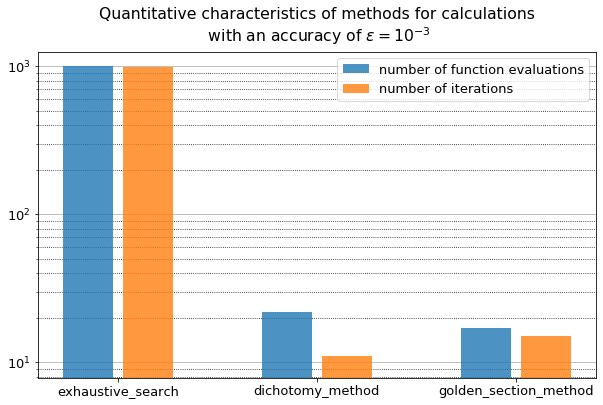

In [3]:
alg_names = [key for key in func_eval_dict.keys()]

for key in alg_names:
    func_eval_dict[key] = int(np.mean(func_eval_dict[key]))
    iter_dict[key] = int(np.mean(iter_dict[key]))
    
    
mpl.rcParams.update({'font.size': 13})
fig = plt.figure(figsize = (10, 6))

ax = plt.axes()
ax.yaxis.grid(True, zorder = 2)
plt.title('Quantitative characteristics of methods for calculations' + \
          '\n with an accuracy of $\epsilon = 10^{-3}$', pad = 10)

xs = range(len(alg_names))

plt.yscale('log')
plt.bar([x  for x in xs], [func_eval_dict[key] for key in alg_names], \
        width = 0.25, alpha = 0.8, label = 'number of function evaluations', zorder = 2)
plt.bar([x + 0.3 for x in xs], [iter_dict[key] for key in alg_names],
        width = 0.25, alpha = 0.8, label = 'number of iterations', zorder = 2)

plt.xticks([i + 0.15 for i in xs], alg_names)
plt.legend(loc = 'upper right')

ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

#fig.autofmt_xdate(rotation = 25)
fig.savefig('bars.png')

----------------------------------------------------------------------------------------------------------------------------

### 2.2 Generate random numbers $\alpha \in (0, 1)$  and $\beta \in (0, 1)$. Furthermore, generate the noisy data {$x_k, y_k$}, where $k = 0, 1, .. 100$, according to the rule: $x_k = \frac{k}{100}$, ${y_k = \alpha x_k + \beta + \delta_k}$, where $\delta_k \sim N(0, 1)$ are values of a random variable with standard normal distribution. Approximate the data by the following linear and rational functions:

### $1) F(x, a, b) = ax + b$ (linear approximant)
### $2) F(x, a, b) = \frac{a}{1 + bx}$ (rational approximant)

### by means of least squares through the numerical minimization (with precision $\varepsilon = 0.001$) of the following function:

### $D(a, b) = \sum\limits_{k = 0}^{100}{(F(x_k, a, b) - y_k)^2}$

### To solve the minimization problem, use the methods of exhaustive search, Gauss and Nelder-Mead. If necessary, set the initial approximations and other parameters of the methods. Visualize the data and the approximants obtained in a plot separately for each type of approximant so that one can compare the results for the numerical methods used. Analyze the results obtained (in terms of number of iterations, precision, number of function evaluations, etc.).

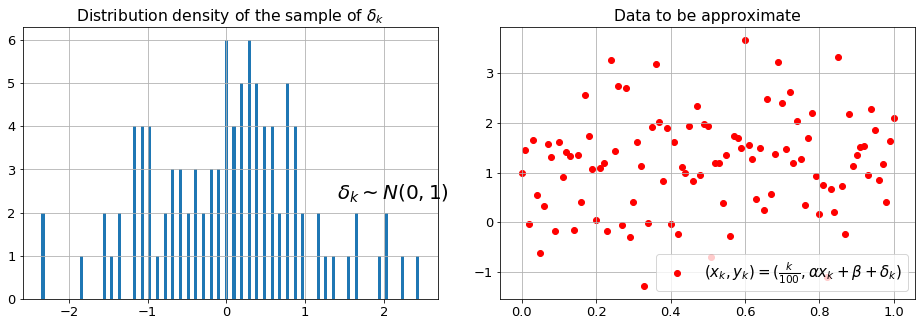

In [12]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Visualization - just to understand the correctness of further results

mpl.rcParams.update({'font.size': 13})
fig, ax = plt.subplots(figsize = (16, 5))
plt.subplots_adjust(wspace = 0.15)

np.random.seed(4)
el_num = 101
mu, sigma = 0, 1
delta_arr = np.random.normal(mu, sigma, el_num)

plt.subplot(1, 2, 1)
plt.hist(delta_arr, bins = 50, rwidth = 0.4)
plt.text(x = 1.4, y = 2.3, s = r'$\delta_k \sim N(0, 1)$', fontsize = 20)
plt.title('Distribution density of the sample of $\delta_k$')
plt.grid()

x_arr = np.linspace(0, 1, el_num)
alpha, beta = np.random.random(), np.random.random()
y_arr = alpha * x_arr + beta * np.ones(el_num) + delta_arr

plt.subplot(1, 2, 2)
plt.scatter(x_arr, y_arr, c = 'r')
plt.title('Data to be approximate')
plt.legend([r'$(x_k, y_k) = (\frac{k}{100}, \alpha x_k + \beta + \delta_k)$'], loc = 'lower right', fontsize = 15)
plt.grid()
plt.show()

np.save('x_arr', x_arr)
np.save('y_arr', y_arr)

fig.savefig('initial_distribution.png')

In [13]:
import pandas as pd
from scipy.optimize import minimize, minimize_scalar


# least_squares_func(*args, **kwargs) == D([a, b], [x_k], [y_k]), where args = [a, b]

def least_squares_linear(args, x_k, y_k):
    return np.sum(np.square(args[0] * x_k + args[1] - y_k))


def least_squares_rational(args, x_k, y_k):
    return np.sum(np.square(args[0] / (1 + args[1] * x_k) - y_k))


def exhaustive_search_mult(func, x_arr, y_arr, left_boundary = -0.9, right_boundary = 1.9, eps = 1e-3):
    
    """ eps = 1e-1 by dafult, because with eps = 1e-3 it takes too much time """
    
    nodes_num = int(1 + (right_boundary - left_boundary) / eps)     # number of nodes in each grid for a and b == len(grid)
    grid = np.linspace(left_boundary, right_boundary, nodes_num)    # grid of values of a and b
    
    func_eval_num = 0
    iter_num = 0
    
    a_min, b_min = grid[0], grid[0]                                 
    func_min = func([a_min, b_min], x_arr, y_arr)    
    func_eval_num += 1
    iter_num += 1
    
    for i in range(nodes_num):                                      # exhaustive search part
        for j in range(nodes_num):
            if (i != 0) and (j != 0):
                
                func_curr = func([grid[i], grid[j]], x_arr, y_arr) 
                func_eval_num += 1
                iter_num += 1

                if func_curr < func_min:
                    a_min, b_min = grid[i], grid[j]
                    func_min = func_curr
    
    n_digits = abs(int(round(np.log10(eps))))
    
    return {'a': round(a_min, n_digits), 'b': round(b_min, n_digits), 'nfev': int(func_eval_num), 'nit': int(iter_num)}


def coordinate_descent_mult(func, x_arr, y_arr, initial_approx = [0, 0], eps = 1e-3):
    
    func_eval_num = 0
    iter_num = 0
    
    a_prev, b_prev = initial_approx[0], initial_approx[1]
    a_curr, b_curr = a_prev + eps, b_prev + eps
        
    while (abs(a_curr - a_prev) >= eps) or (abs(b_curr - b_prev) >= eps):
        
        if iter_num % 2:
            
            res = minimize_scalar(lambda a: func([a, b_prev], x_arr, y_arr))
            
            a_prev, a_curr = a_curr, res.x
            
        else:
            res = minimize_scalar(lambda b: func([a_prev, b], x_arr, y_arr))
            
            b_prev, b_curr = b_curr, res.x

        func_eval_num += res.nfev
        iter_num += 1
    
    n_digits = abs(int(round(np.log10(eps))))

    return {'a': round(a_curr, n_digits), 'b': round(b_curr, n_digits), 'nfev': int(func_eval_num), 'nit': int(iter_num)}


def Nelder_Mead_mult(func, x_arr, y_arr, initial_aprox = [0, 0], eps = 1e-3, disp = False):
    
    res = minimize(func, initial_aprox, args = (x_arr, y_arr), method = 'nelder-mead', options = {'xatol': eps, 'disp': disp})
    n_digits = abs(int(round(np.log10(eps))))

    return {'a': round(res.x[0], n_digits), 'b': round(res.x[1], n_digits), 'nfev': int(res.nfev), 'nit': int(res.nit)}


# Testing:

algos_dict = {'exhaustive search': exhaustive_search_mult, 'coordinate descent method': coordinate_descent_mult, \
                   'Nelder Mead method': Nelder_Mead_mult}

algos_names = algos_dict.keys()
sol_dict = {name: {} for name in algos_names}

for alg_name in algos_names:
    sol_dict[alg_name] = {'linear': [], 'rational': []}

for alg_name in algos_names:
    
    sol_dict[alg_name]['linear'] = algos_dict[alg_name](least_squares_linear, x_arr, y_arr, eps = 1e-3)
    sol_dict[alg_name]['rational'] = algos_dict[alg_name](least_squares_rational, x_arr, y_arr, eps = 1e-3)

df = pd.DataFrame(sol_dict)
print(df)  


# Saving results for the next lab:

df_lin = pd.DataFrame([df[col]['linear'] for col in df.columns]).T
df_lin.columns = algos_dict.keys()
df_lin.to_csv('Linear_approx_lab_2.csv')

df_rat = pd.DataFrame([df[col]['rational'] for col in df.columns]).T
df_rat.columns = algos_dict.keys()
df_rat.to_csv('Rational_approx_lab_2.csv')

                                          exhaustive search  \
linear    {'a': 0.451, 'b': 0.965, 'nfev': 7834402, 'nit...   
rational  {'a': 1.012, 'b': -0.285, 'nfev': 7834402, 'ni...   

                                  coordinate descent method  \
linear    {'a': 0.451, 'b': 0.964, 'nfev': 1744, 'nit': ...   
rational  {'a': 1.011, 'b': -0.285, 'nfev': 3528, 'nit':...   

                                         Nelder Mead method  
linear     {'a': 0.451, 'b': 0.965, 'nfev': 104, 'nit': 53}  
rational  {'a': 1.012, 'b': -0.285, 'nfev': 129, 'nit': 68}  


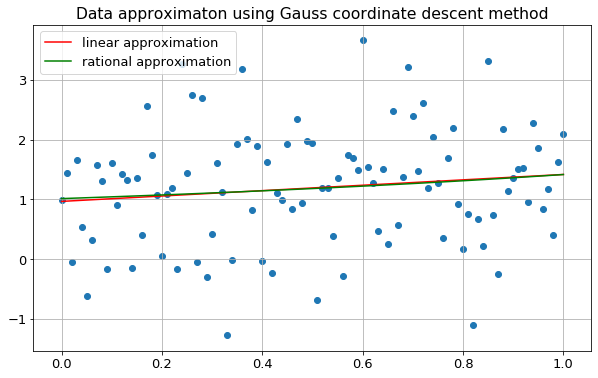

In [14]:
# Vizualization - linar and rational approximation comparison one one plot

fig = plt.figure(figsize = (10, 6))

alg_name = df.columns[1]
plt.title('Data approximaton using Gauss ' + alg_name)
plt.scatter(x_arr, y_arr)

plt.plot(x_arr, df[alg_name]['linear']['a'] * x_arr + df[alg_name]['linear']['b'] , c = 'r')
plt.plot(x_arr, df[alg_name]['rational']['a']  / (1 + x_arr * df[alg_name]['rational']['b'] ), c = 'g')

plt.legend(['linear approximation', 'rational approximation'], loc = 'best')
plt.grid()    
plt.show()

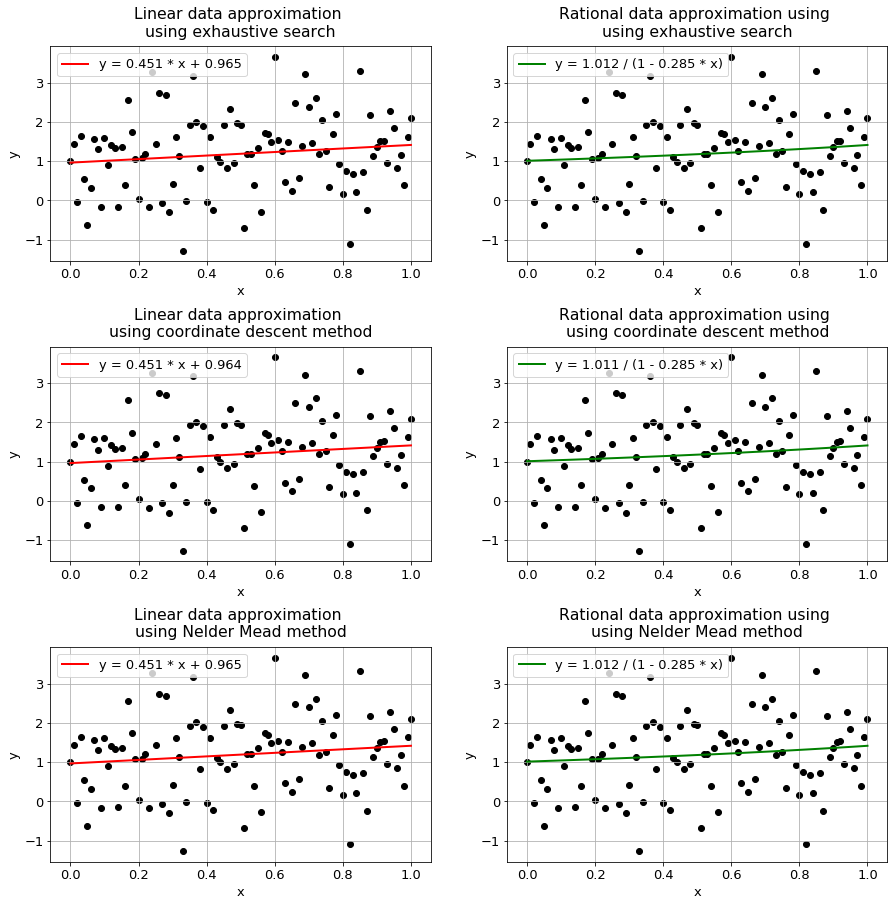

In [15]:
# Vizualization - as it should be

fig = plt.figure(figsize = (15, 15))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)

for i in range (3):
    
    plt.subplot(3, 2, 2 * i + 1)
    plt.scatter(x_arr, y_arr, c = 'k')
    plt.plot(x_arr, df[df.columns[i]]['linear']['a'] * x_arr + df[df.columns[i]]['linear']['b'], \
             c = 'r', linewidth = 2)

    plt.title('Linear data approximation \n' + 'using ' + df.columns[i], pad = 10)
    plt.legend(['y = {0} * x + {1}'.format(df[df.columns[i]]['linear']['a'], df[df.columns[i]]['linear']['b'])], \
               loc = 'upper left')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()


    plt.subplot(3, 2, 2 * i + 2)
    plt.scatter(x_arr, y_arr, c = 'k')
    plt.plot(x_arr, df[df.columns[i]]['rational']['a'] / (1 + x_arr * df[df.columns[i]]['rational']['b']), \
             c = 'g', linewidth = 2)

    plt.title('Rational data approximation using \n' + 'using ' + df.columns[i], pad = 10)
    plt.legend(['y = {0} / (1 - {1} * x)'.format(df[df.columns[i]]['rational']['a'], abs(df[df.columns[i]]['rational']['b']))], \
               loc = 'upper left')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid()

plt.show()

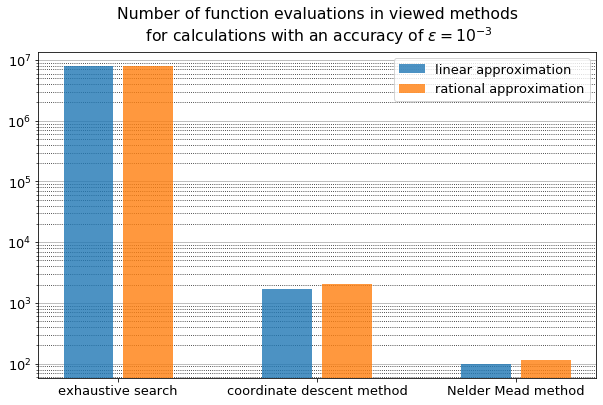

In [8]:
# Vizualization -numbers of function evakuations and iterations comparisson

alg_names = [key for key in func_eval_dict.keys()]

for key in alg_names:
    func_eval_dict[key] = int(np.mean(func_eval_dict[key]))
    iter_dict[key] = int(np.mean(iter_dict[key]))
    
    
mpl.rcParams.update({'font.size': 13})
fig = plt.figure(figsize = (10, 6))

ax = plt.axes()
ax.yaxis.grid(True, zorder = 2)
plt.title('Number of function evaluations in viewed methods' + \
          '\n for calculations with an accuracy of $\epsilon = 10^{-3}$', pad = 10)

algos_names = df.columns
xs = range(len(algos_names))

plt.yscale('log')
plt.bar([x  for x in xs], [df[key]['linear']['nfev'] for key in algos_names], \
        width = 0.25, alpha = 0.8, label = 'linear approximation', zorder = 2)
plt.bar([x + 0.3 for x in xs], [df[key]['rational']['nfev'] for key in algos_names],
        width = 0.25, alpha = 0.8, label = 'rational approximation', zorder = 2)

plt.xticks([i + 0.15 for i in xs], algos_names)
plt.legend(loc = 'upper right')

ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

#fig.autofmt_xdate(rotation = 25)
fig.savefig('bars2.png')

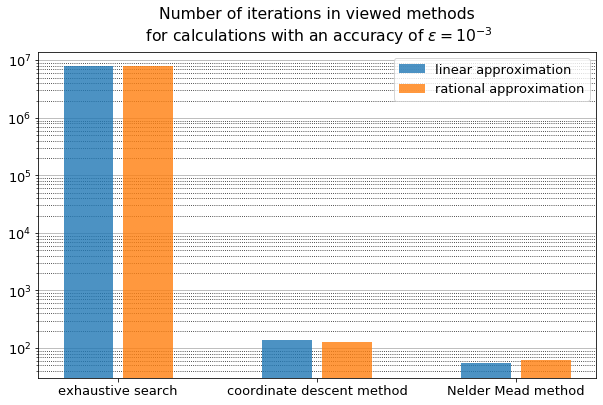

In [9]:
# Vizualization -numbers of function evakuations and iterations comparisson

alg_names = [key for key in func_eval_dict.keys()]

for key in alg_names:
    func_eval_dict[key] = int(np.mean(func_eval_dict[key]))
    iter_dict[key] = int(np.mean(iter_dict[key]))
    
    
mpl.rcParams.update({'font.size': 13})
fig = plt.figure(figsize = (10, 6))

ax = plt.axes()
ax.yaxis.grid(True, zorder = 2)
plt.title('Number of iterations in viewed methods' + '\n for calculations with an accuracy of $\epsilon = 10^{-3}$', pad = 10)

algos_names = df.columns
xs = range(len(algos_names))

plt.yscale('log')
plt.bar([x  for x in xs], [df[key]['linear']['nit'] for key in algos_names], \
        width = 0.25, alpha = 0.8, label = 'linear approximation', zorder = 2)
plt.bar([x + 0.3 for x in xs], [df[key]['rational']['nit'] for key in algos_names],
        width = 0.25, alpha = 0.8, label = 'rational approximation', zorder = 2)

plt.xticks([i + 0.15 for i in xs], algos_names)
plt.legend(loc = 'upper right')

ax.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

#fig.autofmt_xdate(rotation = 25)
fig.savefig('bars3.png')

In [286]:
# precision analysis:

#algos_dict = {'exhaustive search': exhaustive_search_mult, 'coordinate descent method': coordinate_descent_mult,\
#              'Nelder Mead method': Nelder_Mead_mult}

algos_dict = {'coordinate descent method': coordinate_descent_mult, 'Nelder Mead method': Nelder_Mead_mult}

algos_names = algos_dict.keys()
sol_dict = {name: {} for name in algos_names}

for alg_name in algos_names:
    sol_dict[alg_name] = {'linear': [], 'rational': []}
    
eps_arr = np.logspace(-1, -5, 25)


for eps in eps_arr:
    
    for alg_name in algos_names:

        lin_dict = algos_dict[alg_name](least_squares_linear, x_arr, y_arr, eps = eps)
        sol_dict[alg_name]['linear'].append([lin_dict['nfev'], lin_dict['nit']]) 
                                               
        rat_dict = algos_dict[alg_name](least_squares_rational, x_arr, y_arr, eps = eps)
        sol_dict[alg_name]['rational'].append([rat_dict['nfev'], rat_dict['nit']]) 


df = pd.DataFrame(sol_dict)
df

KeyboardInterrupt: 

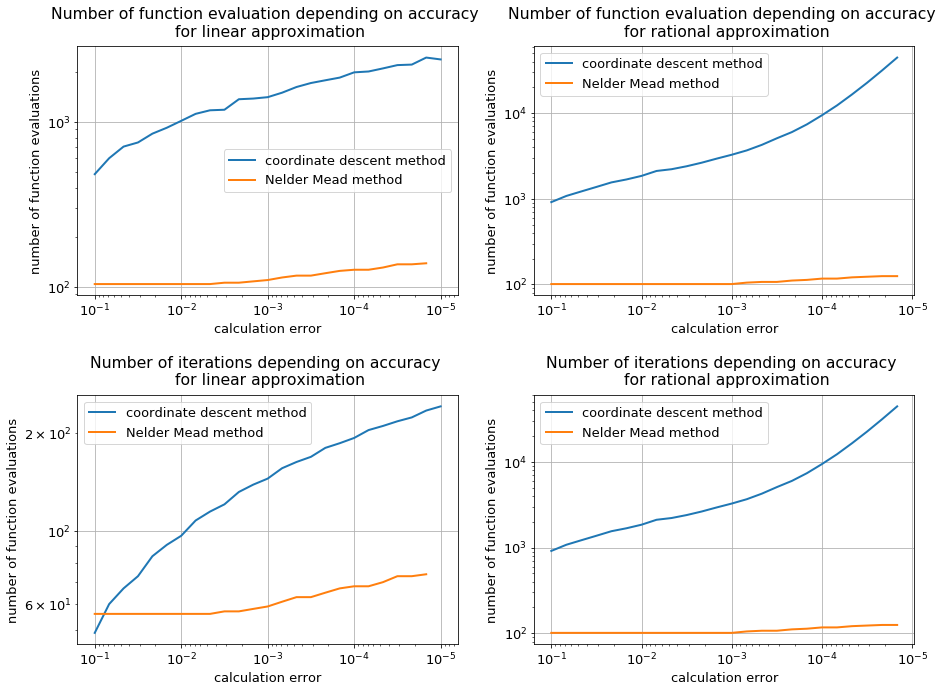

In [304]:
algos_dict = {'coordinate descent method': coordinate_descent_mult,\
              'Nelder Mead method': Nelder_Mead_mult}


fig = plt.figure(figsize = (15, 11))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)


plt.subplot(2, 2, 1)
plt.xscale('log')
plt.yscale('log')
plt.title('Number of function evaluation depending on accuracy \n for linear approximation', pad = 10)

for alg_name in algos_names:
    
    y_data = [sol_dict[alg_name]['linear'][i][0] for i in range(len(sol_dict[alg_name]['linear']))]
    plt.plot(eps_arr[:len(y_data)], y_data, linewidth = 2)
        
plt.legend(algos_names, loc = 'best')
plt.xlabel('calculation error')
plt.ylabel('number of function evaluations')
plt.grid()

ax = plt.gca()
ax.invert_xaxis()


plt.subplot(2, 2, 2)
plt.xscale('log')
plt.yscale('log')
plt.title('Number of function evaluation depending on accuracy \n for rational approximation', pad = 10)

for alg_name in algos_names:
    
    y_data = [sol_dict[alg_name]['rational'][i][0] for i in range(len(sol_dict[alg_name]['rational']))]
    plt.plot(eps_arr[:len(y_data)], y_data, linewidth = 2)
    
plt.legend(algos_names, loc = 'best')
plt.xlabel('calculation error')
plt.ylabel('number of function evaluations')
plt.grid()

ax = plt.gca()
ax.invert_xaxis()


plt.subplot(2, 2, 3)
plt.xscale('log')
plt.yscale('log')
plt.title('Number of iterations depending on accuracy \n for linear approximation', pad = 10)

for alg_name in algos_names:
    
    y_data = [sol_dict[alg_name]['linear'][i][1] for i in range(len(sol_dict[alg_name]['linear']))]
    plt.plot(eps_arr[:len(y_data)], y_data, linewidth = 2)
        
plt.legend(algos_names, loc = 'best')
plt.xlabel('calculation error')
plt.ylabel('number of function evaluations')
plt.grid()

ax = plt.gca()
ax.invert_xaxis()


plt.subplot(2, 2, 4)
plt.xscale('log')
plt.yscale('log')
plt.title('Number of iterations depending on accuracy \n for rational approximation', pad = 10)

for alg_name in algos_names:
    
    y_data = [sol_dict[alg_name]['rational'][i][0] for i in range(len(sol_dict[alg_name]['rational']))]
    plt.plot(eps_arr[:len(y_data)], y_data, linewidth = 2)
    
plt.legend(algos_names, loc = 'best')
plt.xlabel('calculation error')
plt.ylabel('number of function evaluations')
plt.grid()

ax = plt.gca()
ax.invert_xaxis()